<a href="https://colab.research.google.com/github/VictorHolanda21/MachineLearning-PrevisaoFutebol/blob/main/2_Exploracao_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [21]:
# importando biblioteca

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
url_loc_files = '/content/drive/MyDrive/Colab Notebooks/Previsao No Futebol/'

# 2. Exploração dos dados

In [23]:
media_classificacao_time = pd.read_csv(url_loc_files + "media_classificacao_time.csv")
media_classificacao_time.head()

,ano,classificao_time,idade,altura_jogador,peso_jogador
0,2003,1,40.515152,1.831212,74.848485
1,2003,2,43.129032,1.815806,76.709677
2,2003,3,40.000000,1.813590,78.256410
3,2003,4,40.605263,1.828684,75.540541
4,2003,5,41.000000,1.799615,74.000000


In [24]:
# A função isna verifica quais são os valores nulos de toda a tabela
# e depois é calculado a porcentagem desses valores para cada coluna

(media_classificacao_time.isna().sum()/len(media_classificacao_time)*100).sort_values(ascending=False)

ano                 0.0
classificao_time    0.0
idade               0.0
altura_jogador      0.0
peso_jogador        0.0
dtype: float64

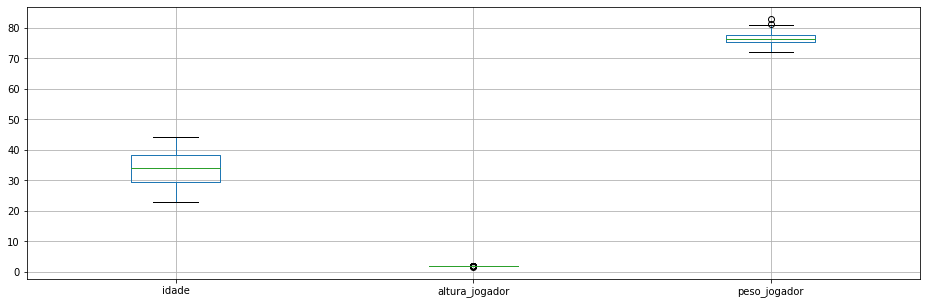

In [25]:
media_classificacao_time.drop(columns=['classificao_time','ano']).boxplot(figsize=(16,5))

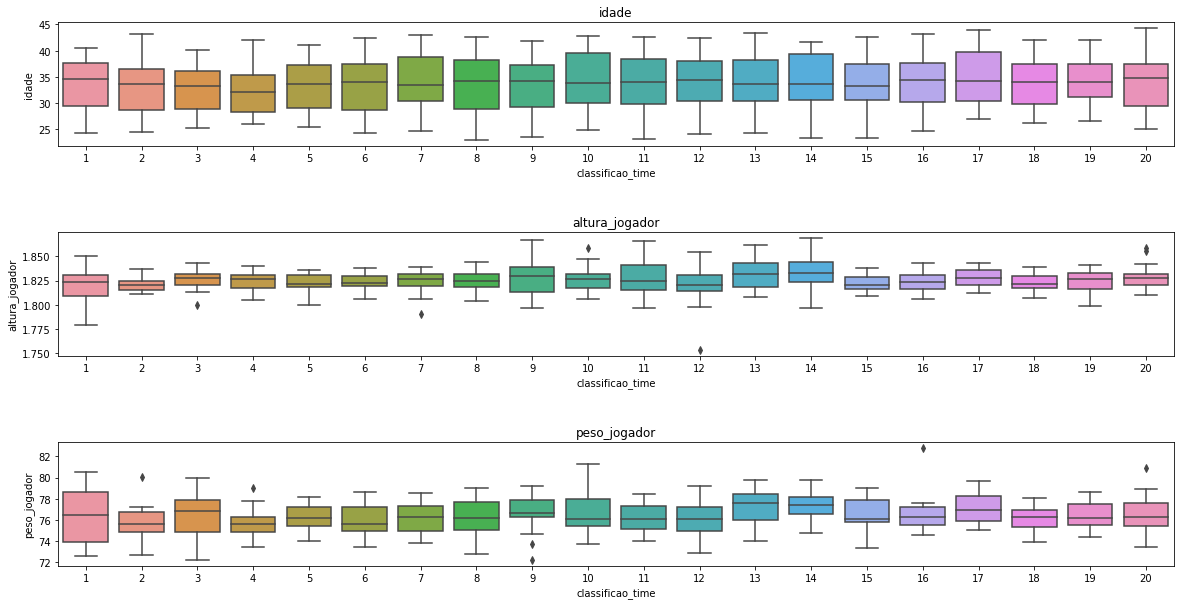

In [26]:
fig, axs = plt.subplots(3,1, figsize=(20,10), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.2)

i = 0
for j, c in enumerate(media_classificacao_time.columns):
  if c not in ['classificao_time', 'ano']:
    # ax = fig.add_subplot(3,2,i)
    sns.boxplot(x='classificao_time', y=c, data=media_classificacao_time, ax=axs[i])
    axs[i].set_title(c)
    i += 1

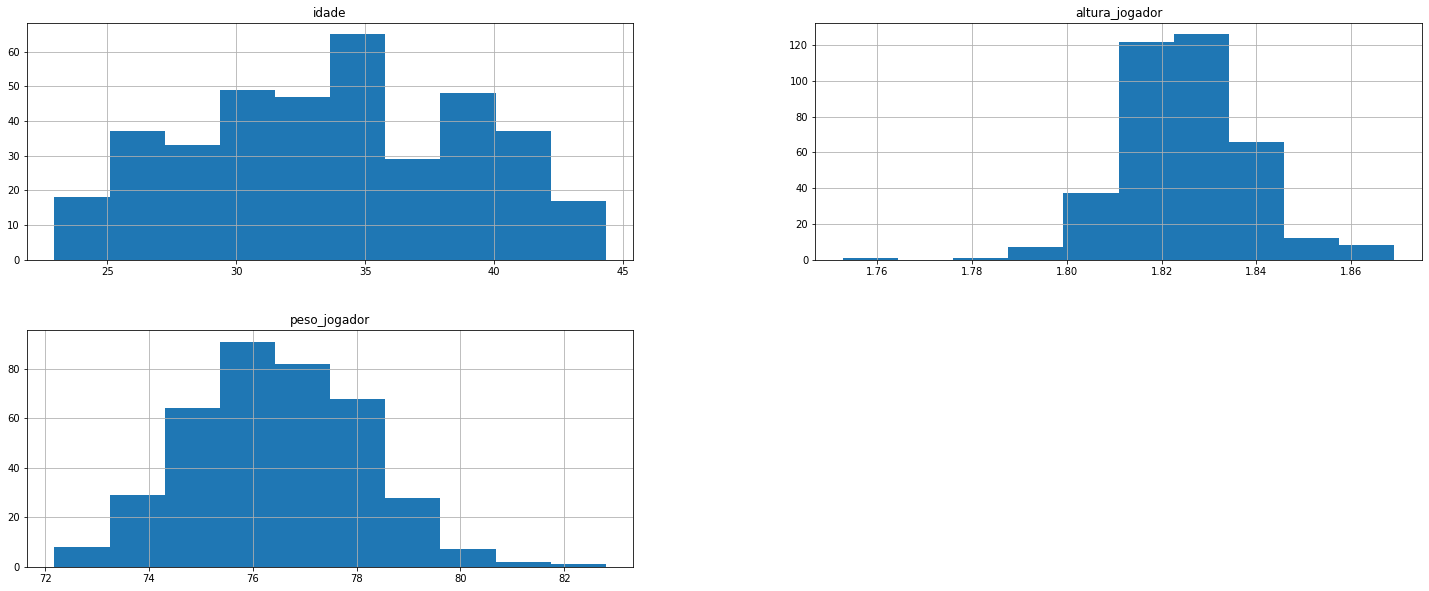

In [27]:
media_classificacao_time.drop(columns=['ano','classificao_time']).hist(figsize=(25,10))
plt.show()

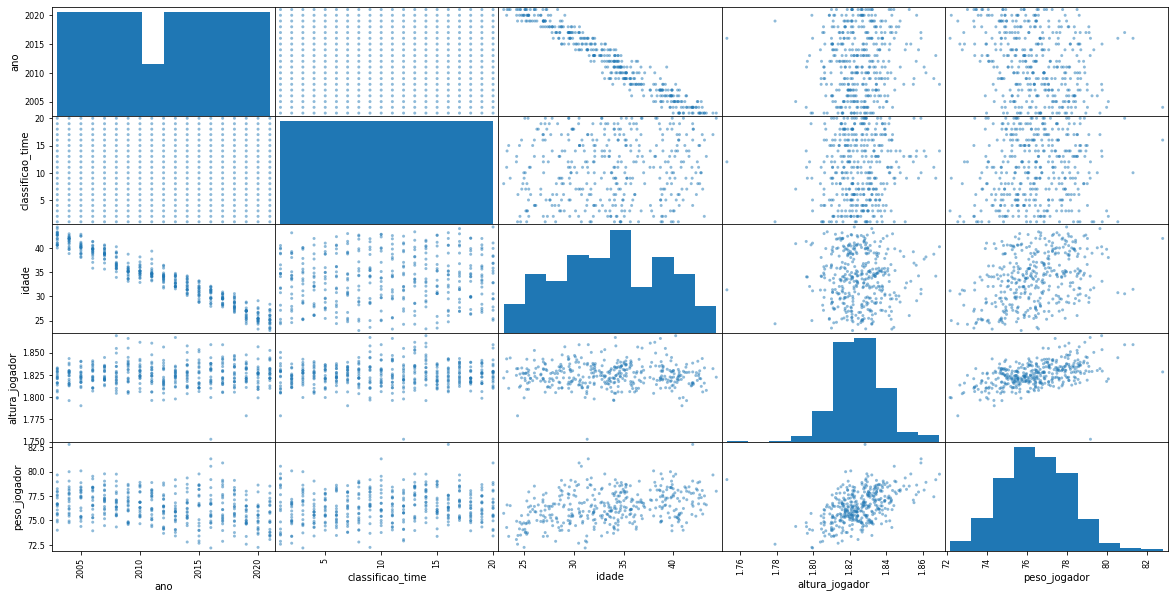

In [28]:
pd.plotting.scatter_matrix(media_classificacao_time, figsize=(20,10))
plt.show()

1. Idade e ano há uma relação linear negativa
2. Altura jogador e peso jogador há uma relação linear positiva (normal -> conceitos de medicina)
3. Peso e idade há relação linear positiva fraca

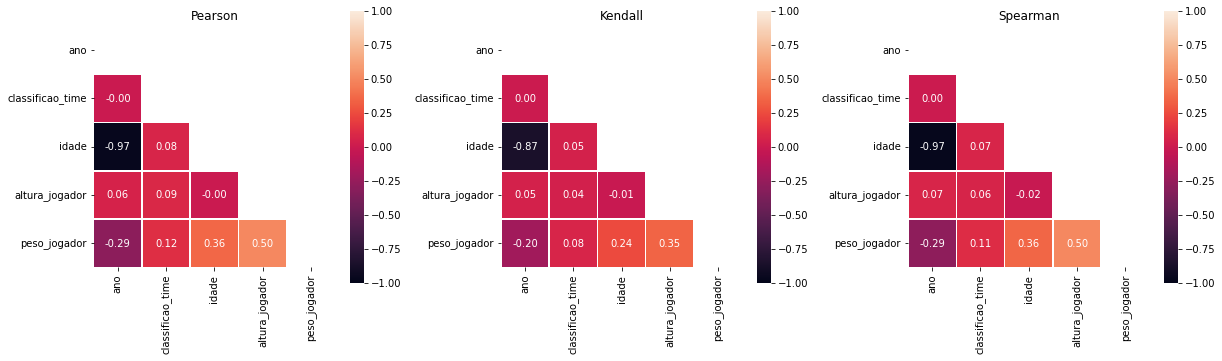

In [29]:
fig, axs = plt.subplots(1,3, figsize=(20,5), sharey=False)
fig.subplots_adjust(hspace=.7, wspace=0.35)

corr      = media_classificacao_time.corr()
kendall   = media_classificacao_time.corr('kendall')
spearman  = media_classificacao_time.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f", linewidths=.5, ax=axs[0])
sns.heatmap(kendall, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f", linewidths=.5, ax=axs[1])
sns.heatmap(spearman, mask=mask, vmax=1, vmin=-1, annot=True, square=True, fmt=".2f", linewidths=.5, ax=axs[2])

axs[0].set_title("Pearson")
axs[1].set_title("Kendall")
axs[2].set_title("Spearman")

plt.show()

1. Classificacao time:
>1.1. Não há correlação com Idade e Altura; <br>
>1.2. Há uma relação positiva fraca com peso jogador, ou seja, quanto menor a posição do time maior o peso do jogador;

2. Ano e idade possuem uma correlação forte;
3. Peso e idade possuem uma correlação razoavel;
4. Peso e altura jogador possuem uma correlação forte;
